In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [2]:
# =======================================================
# 1. TAREA 1: Carga, Limpieza Inicial y Conversión de Tipos
# =======================================================

print("--- INICIO DE LA LIMPIEZA Y PREPROCESAMIENTO ---")
print("1. Carga y Limpieza Inicial")

# Cargar el dataset modificado
df = pd.read_csv('../data/raw/obesity_estimation_modified.csv')

# 1.1. Eliminar columna irrelevante
df = df.drop(columns=['mixed_type_col'])

# 1.2. Normalizar la variable objetivo NObeyesdad
df['NObeyesdad'] = df['NObeyesdad'].str.lower().str.strip()

# 1.3. Conversión de tipos de datos a numérico (coerción de errores)
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Contar NaNs antes de la conversión para ver cuántos errores de formato se añaden
initial_nan_count = df.isnull().sum().sum()

for col in numerical_cols:
    # Coercerá a NaN cualquier valor que no sea un número válido
    df[col] = pd.to_numeric(df[col], errors='coerce')



--- INICIO DE LA LIMPIEZA Y PREPROCESAMIENTO ---
1. Carga y Limpieza Inicial


In [3]:
# =======================================================
# 2. TAREA 2: Imputación de Valores Faltantes (SIN WARNINGS)
# =======================================================

print("\n2. Imputación de Valores Faltantes (NaN)")

# Identificar columnas numéricas y categóricas para imputación
# Usamos .columns.tolist() para garantizar que operamos sobre el DataFrame original
numerical_cols_impute = df.select_dtypes(include=[np.float64]).columns.tolist()
categorical_cols_impute = df.select_dtypes(include=['object']).columns.tolist()

# 2.1. Imputación de Variables Numéricas con la Mediana
for col in numerical_cols_impute:
    median_val = df[col].median()
    # Usamos la ASIGNACIÓN DIRECTA en lugar de inplace=True
    df[col] = df[col].fillna(median_val) 

# 2.2. Imputación de Variables Categóricas con la Moda
for col in categorical_cols_impute:
    mode_val = df[col].mode()[0]
    # Usamos la ASIGNACIÓN DIRECTA en lugar de inplace=True
    df[col] = df[col].fillna(mode_val) 

print(f"Verificación de Nulos: {df.isnull().sum().sum()} (debe ser 0)")



2. Imputación de Valores Faltantes (NaN)
Verificación de Nulos: 0 (debe ser 0)


In [4]:
# =======================================================
# 3. TAREA 3: Gestión de Outliers (Capping)
# =======================================================

print("\n3. Gestión de Outliers (Capping por Dominio)")

# Definir los límites de capping basados en el conocimiento del dominio
capping_limits = {
    'Age': 100, 'Height': 2.5, 'Weight': 300, 'FCVC': 3,
    'NCP': 4, 'CH2O': 3, 'FAF': 3, 'TUE': 2
}

# Aplicar capping (limitar valores máximos)
for col, limit in capping_limits.items():
    df[col] = df[col].clip(upper=limit)

print("Estadísticas Descriptivas de las variables principales después del Capping:")
print(df[list(capping_limits.keys())].describe().T.to_markdown(numalign="left", stralign="left"))




3. Gestión de Outliers (Capping por Dominio)
Estadísticas Descriptivas de las variables principales después del Capping:
|        | count   | mean     | std      | min   | 25%     | 50%      | 75%     | max   |
|:-------|:--------|:---------|:---------|:------|:--------|:---------|:--------|:------|
| Age    | 2153    | 24.9547  | 9.31886  | 14    | 20      | 22.8518  | 26      | 100   |
| Height | 2153    | 1.70983  | 0.118429 | 1.45  | 1.63261 | 1.70358  | 1.77012 | 2.5   |
| Weight | 2153    | 88.6178  | 32.8857  | 39    | 66.4    | 83.3258  | 108.156 | 300   |
| FCVC   | 2153    | 2.42546  | 0.530938 | 1     | 2       | 2.40367  | 3       | 3     |
| NCP    | 2153    | 2.7012   | 0.776241 | 1     | 2.69289 | 3        | 3       | 4     |
| CH2O   | 2153    | 2.02064  | 0.614743 | 1     | 1.61819 | 2        | 2.5032  | 3     |
| FAF    | 2153    | 1.03863  | 0.866825 | 0     | 0.15136 | 1        | 1.68623 | 3     |
| TUE    | 2153    | 0.663924 | 0.612093 | 0     | 0       | 0.62797


4. Análisis Exploratorio de Datos (EDA)


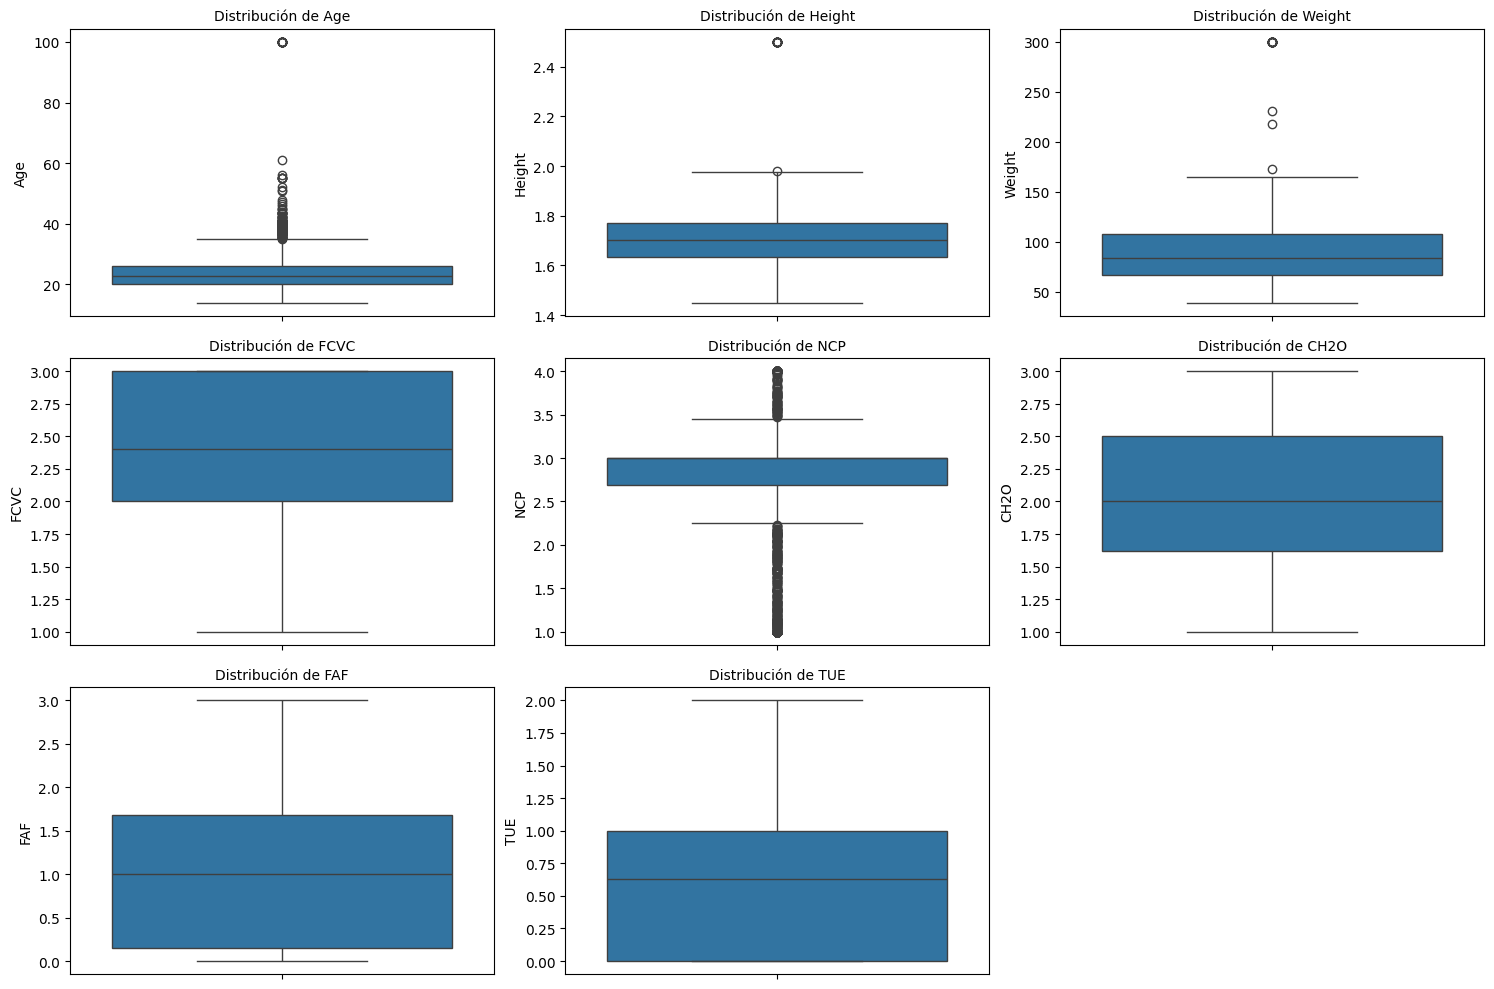

 -> Boxplots guardados en 'numerical_boxplots.png'


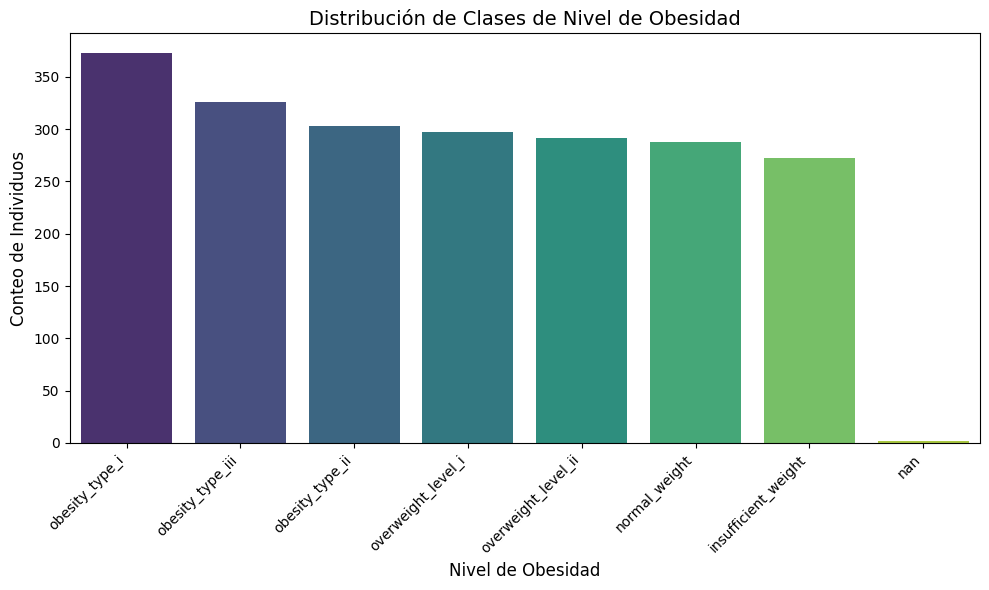

 -> Distribución de Target guardada en 'target_distribution.png'


In [6]:
# =======================================================
# 4. TAREA 3/4: Exploración de Datos (EDA)
# =======================================================

print("\n4. Análisis Exploratorio de Datos (EDA)")

# 4.1. Generar Boxplots para variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(capping_limits.keys()):
    plt.subplot(3, 3, i + 1)
    # Boxplot se muestra en el notebook
    sns.boxplot(y=df[col]) 
    plt.title(f'Distribución de {col}', fontsize=10)
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('numerical_boxplots.png')
# No llamamos a plt.close() aquí para que la gráfica se muestre
plt.show() # Muestra la primera gráfica
print(" -> Boxplots guardados en 'numerical_boxplots.png'")


# 4.2. Gráfico de Distribución de la Variable Objetivo (SIN WARNING)
plt.figure(figsize=(10, 6))

target_counts = df['NObeyesdad'].value_counts()

# CORRECCIÓN DE WARNING: Asignamos 'x' a 'hue' y deshabilitamos la leyenda
sns.barplot(
    x=target_counts.index, 
    y=target_counts.values, 
    palette='viridis',
    hue=target_counts.index, # Mapear el índice a hue
    legend=False             # Deshabilitar la leyenda redundante
)

plt.title('Distribución de Clases de Nivel de Obesidad', fontsize=14)
plt.xlabel('Nivel de Obesidad', fontsize=12)
plt.ylabel('Conteo de Individuos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('target_distribution.png')
# No llamamos a plt.close() aquí para que la gráfica se muestre
plt.show() # Muestra la segunda gráfica
print(" -> Distribución de Target guardada en 'target_distribution.png'")


In [7]:
# =======================================================
# 5. TAREA 5: Preprocesamiento Final (Encoding)
# =======================================================

print("\n5. Codificación de Variables (Encoding)")

# 5.1. Label Encoding para la Variable Objetivo (Target)
le = LabelEncoder()
df['NObeyesdad_Encoded'] = le.fit_transform(df['NObeyesdad'])

target_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeo de Clases NObeyesdad:")
print(pd.Series(target_mapping).to_markdown(numalign="left", stralign="left"))

# 5.2. One-Hot Encoding para Variables Categóricas (Features)
df_temp = df.drop(columns=['NObeyesdad']) # Quitar la columna original
categorical_features_final = df_temp.select_dtypes(include=['object']).columns

df_final_encoded = pd.get_dummies(
    df_temp, 
    columns=categorical_features_final, 
    drop_first=True
)




5. Codificación de Variables (Encoding)
Mapeo de Clases NObeyesdad:
|                     | 0   |
|:--------------------|:----|
| insufficient_weight | 0   |
| nan                 | 1   |
| normal_weight       | 2   |
| obesity_type_i      | 3   |
| obesity_type_ii     | 4   |
| obesity_type_iii    | 5   |
| overweight_level_i  | 6   |
| overweight_level_ii | 7   |


In [8]:
# =======================================================
# 6. Guardar el Dataset Final Preprocesado
# =======================================================


df_final_encoded.to_csv('../data/processed/a01796211/obesity_estimation_final_preprocessed.csv', index=False)
print(f"\nDataset final guardado como: obesity_estimation_final_preprocessed.csv ({df_final_encoded.shape[0]} filas, {df_final_encoded.shape[1]} columnas).")




Dataset final guardado como: obesity_estimation_final_preprocessed.csv (2153 filas, 48 columnas).
